Indah Wulan Lestari

2009106027

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv("bike_buyers_edit.csv")
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,4000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
2,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
3,12496,Married,Male,40000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
4,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No


In [36]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cars'] = df['Cars'].fillna(df['Cars'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Children'] = df['Children'].fillna(df['Children'].mean())

In [38]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               0
Children             0
Education            0
Occupation           0
Home Owner           4
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1007 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            996 non-null    object 
 3   Income            1007 non-null   float64
 4   Children          1007 non-null   float64
 5   Education         1007 non-null   object 
 6   Occupation        1007 non-null   object 
 7   Home Owner        1003 non-null   object 
 8   Cars              1007 non-null   float64
 9   Commute Distance  1007 non-null   object 
 10  Region            1007 non-null   object 
 11  Age               1007 non-null   float64
 12  Purchased Bike    1007 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 102.4+ KB


In [40]:
df_subset = df[['Cars','Age']]
plt.show()

ss = StandardScaler()
scaled = ss.fit_transform(df_subset)

## UNSUPERVISED LEARNING

##### Agglomerative Clustering

In [41]:
# Membuat objek dengan jumlah cluster 3
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

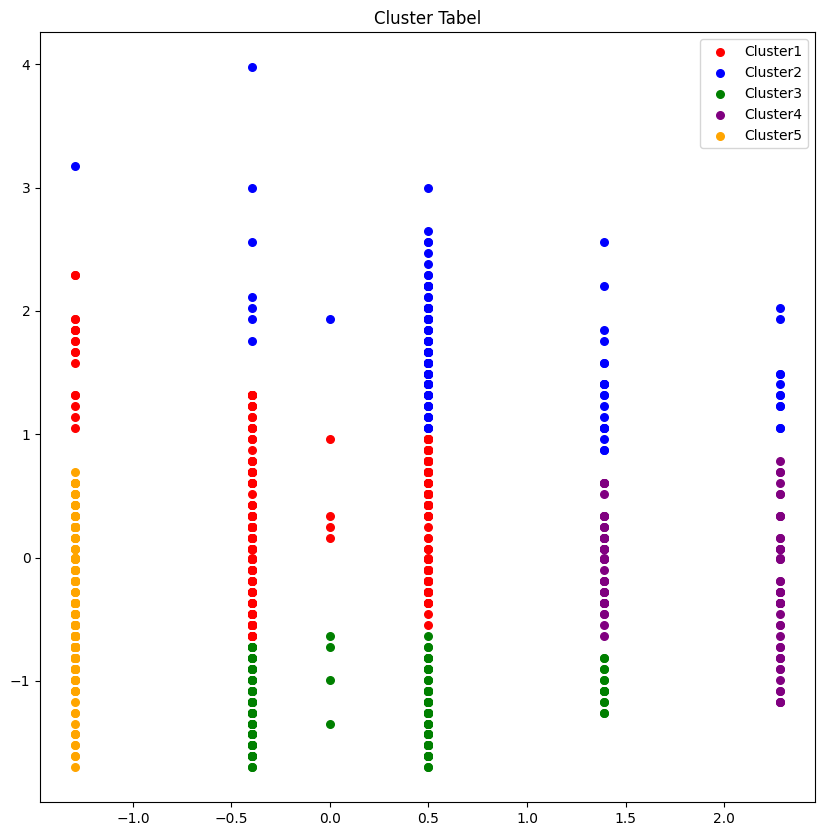

In [42]:
AC = HC.fit_predict(scaled)

#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scaled[AC==0, 0],scaled[AC==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[AC==1, 0],scaled[AC==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(scaled[AC==2, 0],scaled[AC==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(scaled[AC==3, 0],scaled[AC==3, 1], s=30, c='purple', label ='Cluster4')
plt.scatter(scaled[AC==4, 0],scaled[AC==4, 1], s=30, c='orange', label ='Cluster5')

plt.title("Cluster Tabel")
plt.legend()
plt.show()

#### Dendogram

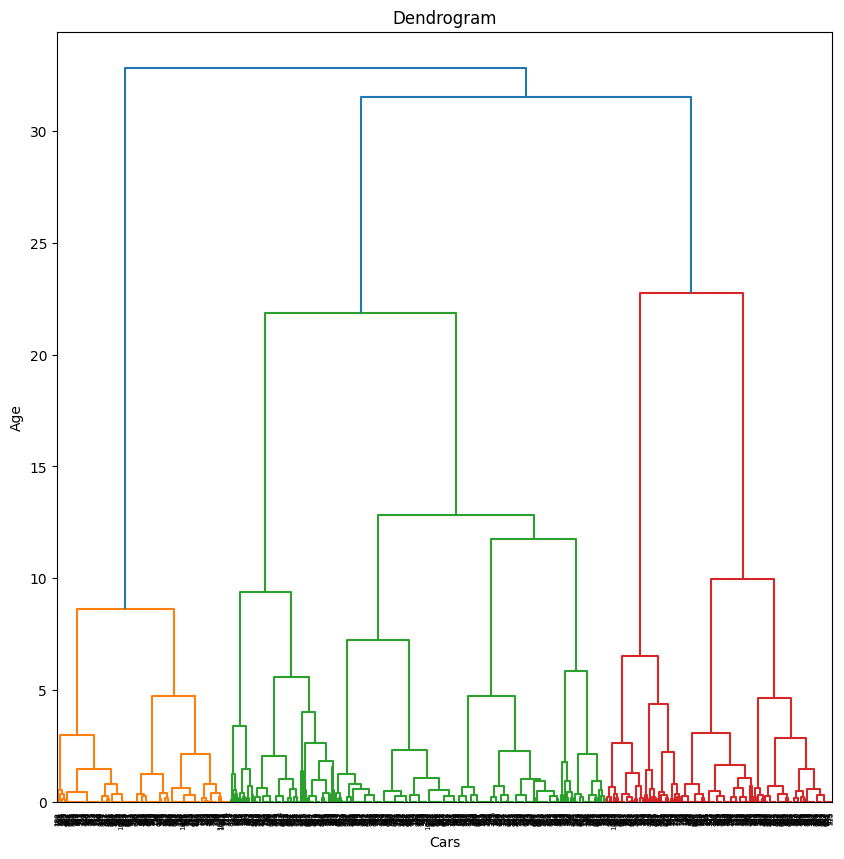

In [43]:
HR_linkrase = linkage(scaled, method='ward')

plt.figure(figsize=(10,10))
dendrogram(HR_linkrase)
plt.title("Dendrogram")
plt.xlabel("Cars")
plt.ylabel("Age")
plt.show()

#### K-Means Clustering

In [44]:
points = df[['Cars', 'Age']]
points = points.values

In [45]:
model = KMeans(n_clusters=4)
model.fit(points)

KMeans(n_clusters=4)

In [46]:
y = model.fit_predict(points)
print(y)

[2 2 2 ... 2 2 3]


In [48]:
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

centroid

array([[ 1.84551294, 63.88356164],
       [ 1.25632645, 31.57586207],
       [ 1.33911248, 41.46914192],
       [ 1.57104373, 50.98770492]])

##### Visualisasi Cluster

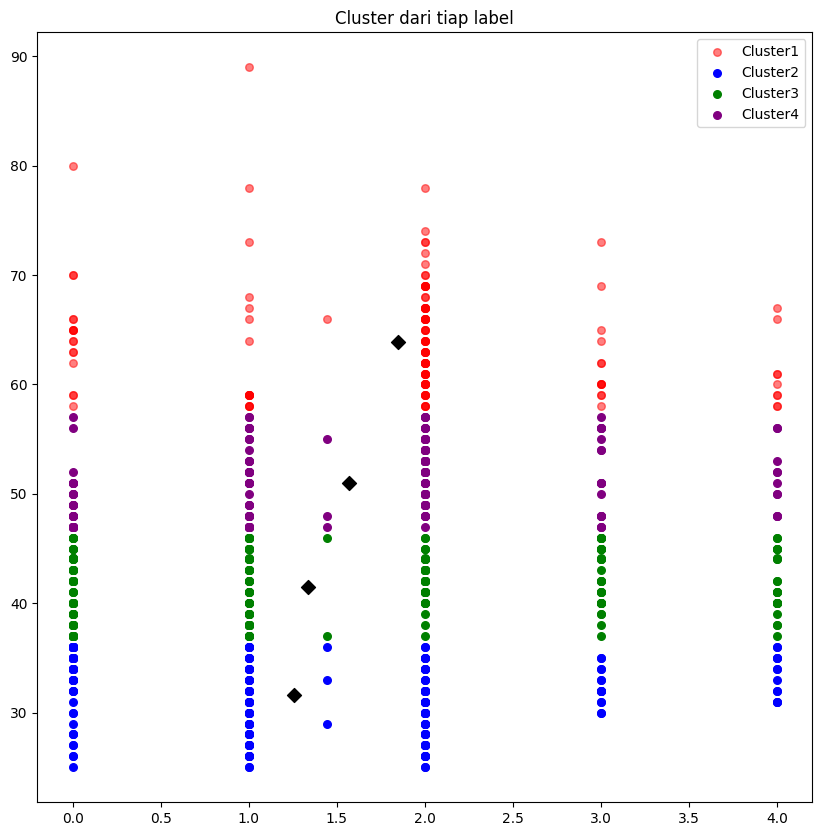

In [49]:
plt.figure(figsize=(10,10))

#data point
plt.scatter(points[y==0, 0],points[y==0, 1], s=30, c='red', label ='Cluster1', alpha=0.5)
plt.scatter(points[y==1, 0],points[y==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(points[y==2, 0],points[y==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(points[y==3, 0],points[y==3, 1], s=30, c='purple', label ='Cluster4')

#centroid point
plt.scatter(centroid_x, centroid_y, marker='D', s=50 ,c='black')
plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

#### Menentukna Jumlah Cluster

In [50]:
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

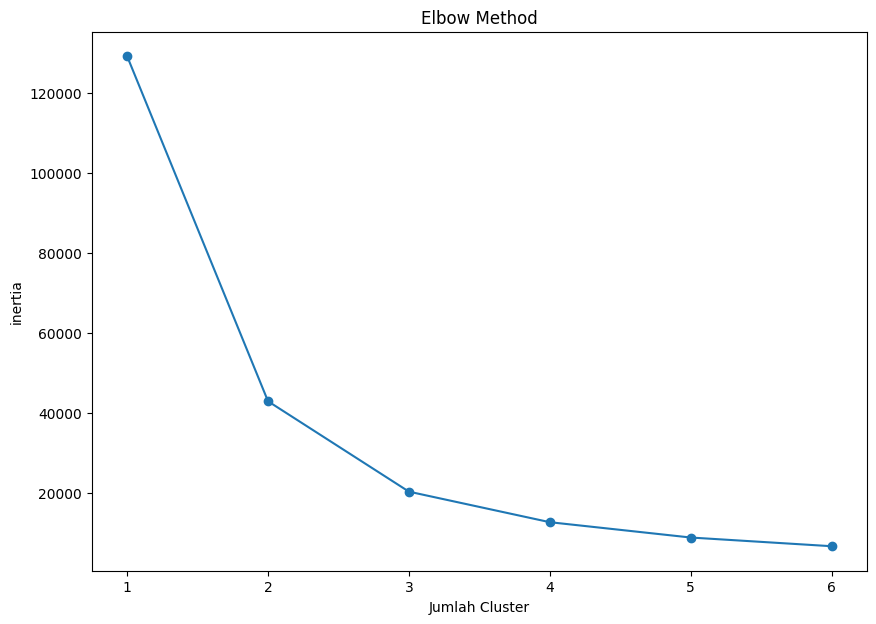

In [51]:
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()